In [26]:
import spectral
import spectral.io.envi as envi
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')


In [12]:
# Load data
im = envi.open('AVIRIS_Boron_Mine_REF_clean188.hdr')
im_arr = im.load()
lib = envi.open('sli_Boron_188bands.hdr')

In [51]:
# Get some data into nice varaible
wl = lib.bands.centers
im_rgb = im_arr[:,:,[30,20,10]]
nRows, nCols, nBands = im_arr.shape
im_list = np.reshape(im_arr, (nRows*nCols, nBands))

In [54]:
im_list.shape

(1142166, 188)

In [52]:
im_rgb.shape

(1634, 699, 3)

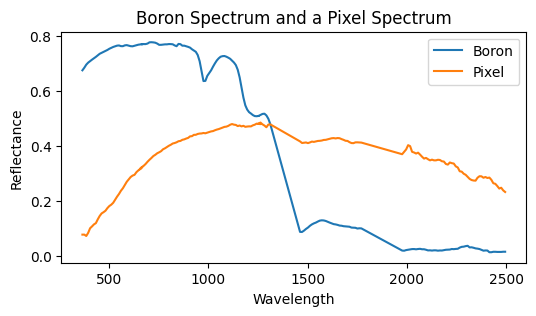

In [61]:
# Plot the target spectrum
fig = plt.figure(figsize=(6,3))
plt.plot(wl, lib.spectra[0,:], label='Boron');
plt.plot(wl, im_list[1000,:].flatten(), label='Pixel');
plt.title('Boron Spectrum and a Pixel Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance');
plt.legend();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


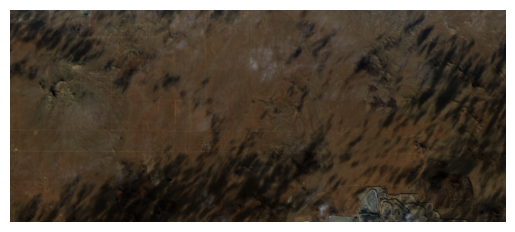

In [66]:
plt.imshow(np.rot90(im_rgb))
plt.axis('off');

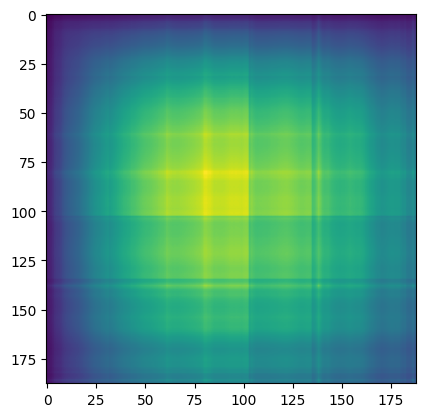

In [86]:
# Compute the mean
mu = np.mean(im_list, axis=0)
# Compute the covariance
C = np.cov(im_list.T)
plt.imshow(C);

In [91]:
evals, evecs = np.linalg.eig(C)
print(evals.shape)
print(evecs.shape)

(188,)
(188, 188)


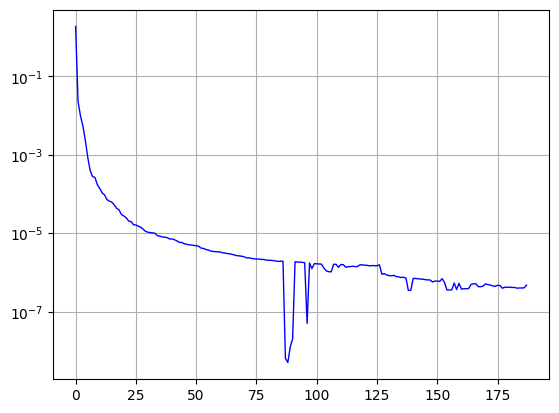

In [98]:
# plot the eigenvalues
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(evals, color='blue', lw=1)
plt.grid()
ax.set_yscale('log')

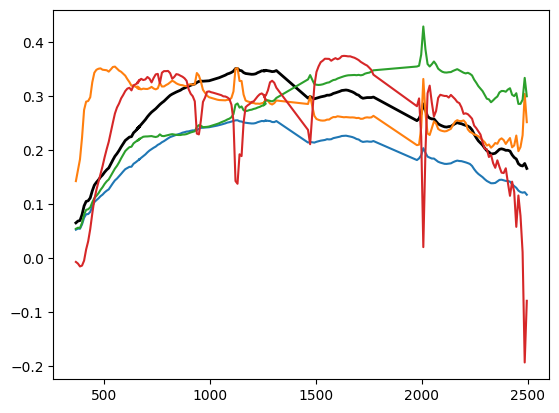

In [103]:
# plot the eigenvectors
plt.plot(wl,mu, color='k', lw=2)
plt.plot(wl,mu+evecs[:,0])
plt.plot(wl,mu+evecs[:,1])
plt.plot(wl,mu+evecs[:,2])
plt.plot(wl,mu+evecs[:,3])